In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(dplyr)

In [3]:
library(viridis)

Loading required package: viridisLite


In [4]:
library(ggplot2)

In [67]:
library(stringr)

In [5]:
data_renova <- read.csv("no_anp_renova_cusco.csv")

In [6]:
head(data_renova)

OBJECTID,FID_V_17,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD
6873,0,CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39573,-73.21041
6874,0,CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39569,-73.21041
6875,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38080,-72.03791
6876,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38079,-72.03796
6877,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38003,-72.03660
6878,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.37986,-72.03657


In [7]:
data_solaris <- read.csv("no_anp_solaris_cusco.csv")

In [8]:
head(data_solaris)

OBJECTID,VERTICE,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD
28584,3576,CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359
28603,3595,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364
28604,3596,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411
28605,3597,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934
28606,3598,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950
28607,3599,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409


In [9]:
data_1 <- data_solaris %>%
    filter(REGION == "CUSCO") %>%
  select(REGION, PROVINCIA, DISTRITO, LOCALIDAD, LATITUD, LONGITUD) %>% 
  mutate(EMPRESA = "RENOVA")

In [10]:
head(data_1)

REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409,RENOVA


In [11]:
data_2 <- data_renova %>%
  filter(REGION == "CUSCO") %>%
  select(REGION, PROVINCIA, DISTRITO, LOCALIDAD, LATITUD, LONGITUD) %>%
  mutate(EMPRESA = "ORIENTAL")

In [12]:
head(data_2)

REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39573,-73.21041,ORIENTAL
CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39569,-73.21041,ORIENTAL
CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38080,-72.03791,ORIENTAL
CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38079,-72.03796,ORIENTAL
CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38003,-72.03660,ORIENTAL
CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.37986,-72.03657,ORIENTAL


In [39]:
data_consolidada <- rbind(data_1,data_2)

In [14]:
head(data_consolidada)

REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409,RENOVA


In [80]:
data_consolidada <- data_consolidada %>%
    mutate(PROVINCIA = str_trim(PROVINCIA, side="both"))

In [81]:
head(data_consolidada_new)

REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950,RENOVA
CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409,RENOVA


In [82]:
users_by_localidad <- data_consolidada %>%
    dplyr::group_by(PROVINCIA, DISTRITO, LOCALIDAD) %>%
    dplyr::summarise(
        q_users = n()
    )

In [83]:
users_by_distrito <- users_by_localidad %>%
  group_by(PROVINCIA, DISTRITO) %>%
  summarise(
    q_users = sum(q_users)
  )

In [84]:
users_by_provincia <- users_by_distrito %>%
  group_by(PROVINCIA) %>%
  summarise(
    q_users = sum(q_users)
  )

In [85]:
users_by_provincia

PROVINCIA,q_users
ACOMAYO,1732
ANTA,986
CALCA,2107
CANAS,6897
CANCHIS,3732
CHUMBIVILCAS,13419
CUSCO,165
ESPINAR,17266
LA CONVENCION,16217
PARURO,3915


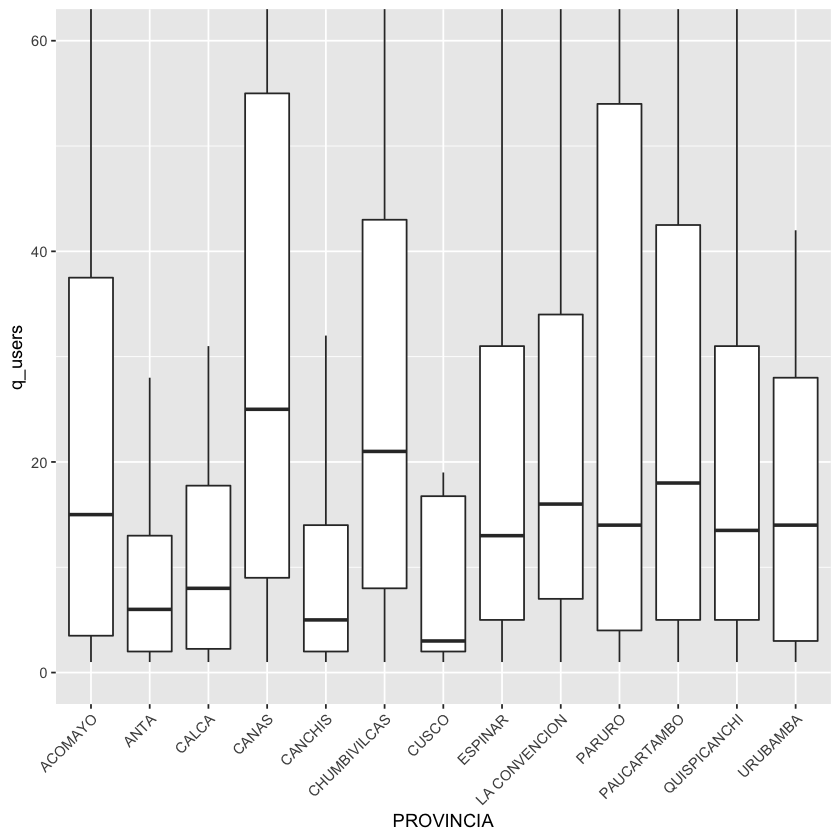

In [86]:
users_by_localidad %>%
  ggplot(aes(x=PROVINCIA, y=q_users)) +
  geom_boxplot(outlier.shape = NA) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_cartesian(ylim =  c(0, 60))

In [87]:
mtemp <- table(users_by_localidad$PROVINCIA)

In [88]:
mtemp


      ACOMAYO          ANTA         CALCA         CANAS       CANCHIS 
           51            65            66           141           183 
 CHUMBIVILCAS         CUSCO       ESPINAR LA CONVENCION        PARURO 
          281            12           525           236            69 
  PAUCARTAMBO  QUISPICANCHI      URUBAMBA 
          143           230            21 

In [89]:
mtemp <- 1:length(table(users_by_localidad$PROVINCIA))

In [90]:
mtemp

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

In [91]:
mtemp <- aggregate(q_users ~ PROVINCIA, users_by_localidad, median)[,2]

In [92]:
mtemp

[1] 15.0  6.0  8.0 25.0  5.0 21.0  3.0 13.0 16.0 14.0 18.0 13.5 14.0

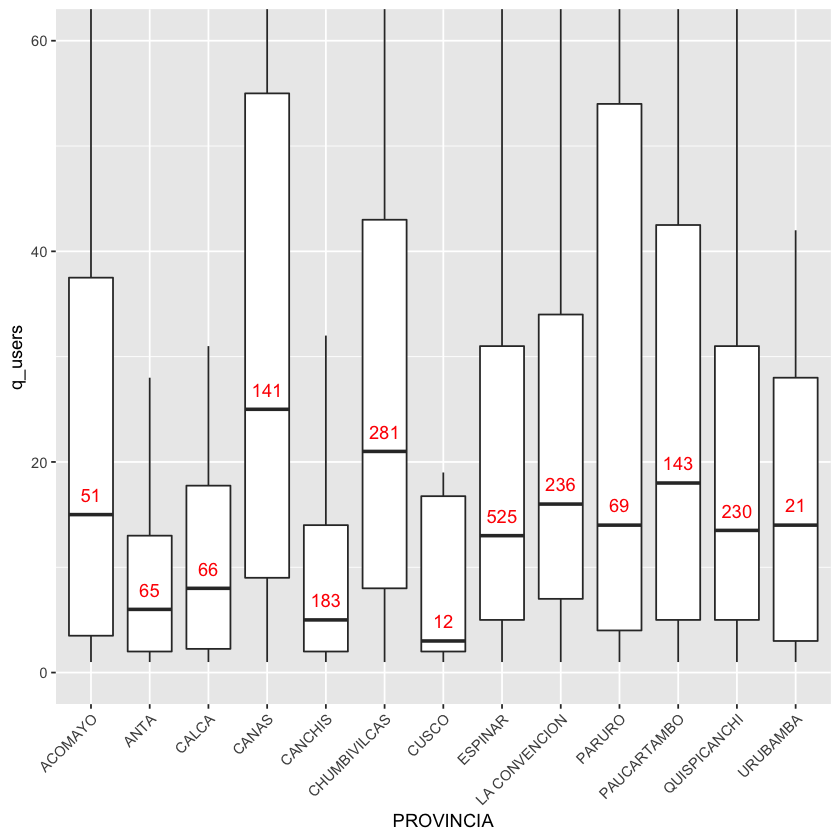

In [94]:
users_by_localidad %>%
  ggplot(aes(x=PROVINCIA, y=q_users)) +
  geom_boxplot(outlier.shape = NA) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_cartesian(ylim =  c(0, 60)) +
  annotate("text",
           x = 1:length(table(users_by_localidad$PROVINCIA)),
           y = aggregate(q_users ~ PROVINCIA, users_by_localidad, median)[,2],
           #y = 55,
           label = table(users_by_localidad$PROVINCIA),
           col = "red",
           vjust = -1)

In [60]:
ToothGrowth %>%
  group_by(supp) %>%
  arrange(len)

len,supp,dose
4.2,VC,0.5
5.2,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
7.0,VC,0.5
7.3,VC,0.5
8.2,OJ,0.5
9.4,OJ,0.5
9.7,OJ,0.5
9.7,OJ,0.5


In [62]:
ToothGrowth %>%
  group_by(supp) %>%
  arrange(len, .by_group = TRUE)

len,supp,dose
8.2,OJ,0.5
9.4,OJ,0.5
9.7,OJ,0.5
9.7,OJ,0.5
10.0,OJ,0.5
14.5,OJ,0.5
14.5,OJ,1.0
15.2,OJ,0.5
16.5,OJ,0.5
17.6,OJ,0.5
